In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
df = pd.read_csv("Employee.csv")

for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Summary statistics
df.describe(include="all")

# Rename columns if necessary
df.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)
df.head()

Company: 6 unique values
Age: 29 unique values
Salary: 40 unique values
Place: 11 unique values
Country: 1 unique values
Gender: 2 unique values


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [2]:
# Checking for missing values
df.isnull().sum()
# Removing duplicate rows
df.drop_duplicates(inplace=True)
# Replacing 0 in 'age' column with NaN
df.replace({"Age":0}, pd.NA, inplace=True)
# Handling missing values (Choose appropriate method)
df.fillna(df.select_dtypes(include='number').median(), inplace=True)
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


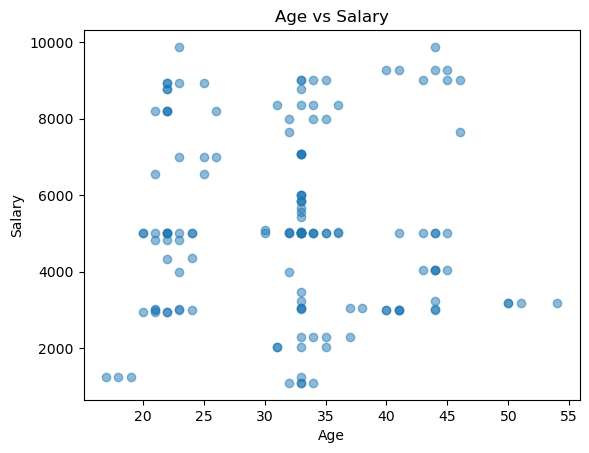

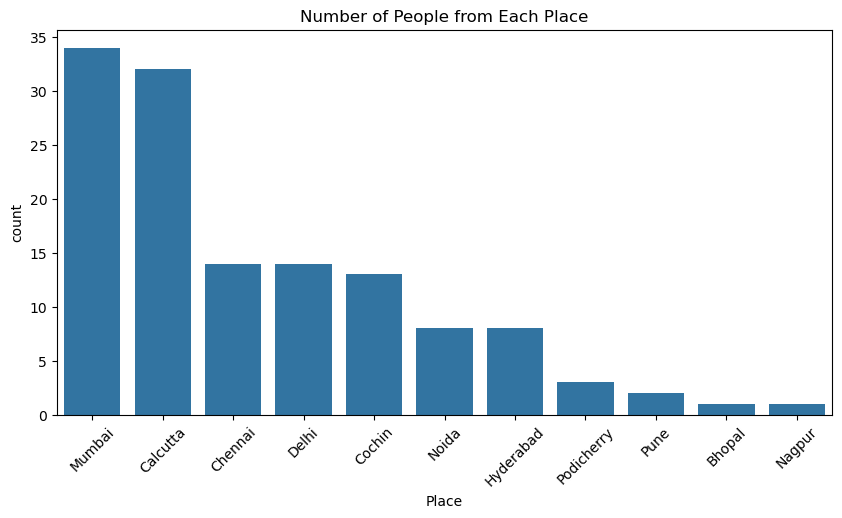

In [4]:
# Filtering data
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
filtered_df.head()

# Plotting age vs salary
pd.set_option('future.no_silent_downcasting', True) # Geting a future behaviour error without dis.
df.fillna({"Age": df['Age'].median()}, inplace=True)
df.fillna({"Salary": df['Salary'].median()}, inplace=True)
plt.scatter(df['Age'], df['Salary'], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.show()

# Countplot for places
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Place'], order=df['Place'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of People from Each Place")
plt.show()

In [5]:
# Label Encoding
le = LabelEncoder()
df['Company'] = le.fit_transform(df['Company'])
df['Place'] = le.fit_transform(df['Place'])
df.head()

,Company,Age,Salary,Place,Country,Gender
0,4,20.0,5000.0,2,India,0
1,2,30.0,5000.0,6,India,0
2,4,35.0,2300.0,1,India,0
3,2,40.0,3000.0,4,India,0
4,4,23.0,4000.0,6,India,0


In [6]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Company'])
df = pd.get_dummies(df, columns=['Place'])
df.head()

,Age,Salary,Country,Gender,Company_0,Company_1,Company_2,Company_3,Company_4,Company_5,...,Place_2,Place_3,Place_4,Place_5,Place_6,Place_7,Place_8,Place_9,Place_10,Place_11
0,20.0,5000.0,India,0,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,30.0,5000.0,India,0,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,35.0,2300.0,India,0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,40.0,3000.0,India,0,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,23.0,4000.0,India,0,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [12]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])
df.head()

,Age,Salary,Country,Gender,Company_0,Company_1,Company_2,Company_3,Company_4,Company_5,...,Place_2,Place_3,Place_4,Place_5,Place_6,Place_7,Place_8,Place_9,Place_10,Place_11
0,-1.484676,-0.100827,India,0,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,-0.267174,-0.100827,India,0,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.341577,-1.243735,India,0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0.950328,-0.947426,India,0,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,-1.119426,-0.524127,India,0,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [11]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
df[['Age', 'Salary']] = minmax_scaler.fit_transform(df[['Age', 'Salary']])
df.head()

,Age,Salary,Country,Gender,Company_0,Company_1,Company_2,Company_3,Company_4,Company_5,...,Place_2,Place_3,Place_4,Place_5,Place_6,Place_7,Place_8,Place_9,Place_10,Place_11
0,0.081081,0.445089,India,0,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,0.351351,0.445089,India,0,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.486486,0.137817,India,0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0.621622,0.217480,India,0,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0.162162,0.331285,India,0,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
